# Amoebas and coamoebas #
Let $P(z,w)$ be a complex polynomial in two variables. The *amoeba* of $P$ is the image of the zero locus of $P$ by the map $(z,w) \mapsto (\log|z|,\log|w|)$. The *coamoeba* of $P$ is the image of the same set by $(z,w) \mapsto (\arg(z),\arg(w))$.

In [1]:
R.<z,w> = CDF['z','w'] #the CDF (Complex Double Field) allows for faster computations.
I=CDF(I) #the complex number (I^2=-1)

In [2]:
#P=z*(1-z^5-(1.4+0.3*I)*w^5+0.5*z^4*w^4 - 20*z^2*w) + w^3 #example polynomial
P=1-z-w-6*z*w-z^2*w^2

The following functions plots the amoeba numerically. Most of the code is adapted from Milo Bogaard's [Introduction to amoebas and tropical geometry](https://scripties.uba.uva.nl/download?fid=564840).

In [3]:
def amoeba (f, grid_step=100, angle_step=50, xm=-5., xM=5., ym=-5., yM=5.):
    # Takes a polynomial f in z,w over CDF and draws its amoeba.
    # The parameters xm, xM, ym, yM set the plotting window.
    # grid_step is the number of discrete points in |z|,|w| taken in the disretization,
    # and angle_step the number of points in arg(z),arg(w).
    # High values of grid_step and angle_step give a more full picture but make the computation longer.
    
    x_grid_step_size = (xM-xm)/grid_step
    List_x = []
    for j in range(1,grid_step):
        r=CDF(xm+j*x_grid_step_size)
        for k in srange(0,angle_step):
            theta = CDF((k/angle_step)*2*pi)
            z1 = CDF(e^r * e^(I*theta))
            g = f(z1,w)
            h = g.univariate_polynomial()
            S = h.roots(multiplicities=False)
            for p2 in S:
                logp2 = log(abs(p2))
                List_x.append((r,logp2))
                
    y_grid_step_size = (yM-ym)/grid_step
    List_y = []
    for j in range(1,grid_step):
        r=CDF(ym+j*y_grid_step_size)
        for k in srange(0,angle_step):
            theta = CDF((k/angle_step)*2*pi)
            w1 = CDF(e^r * e^(I*theta))
            g = f(z,w1)
            h=g.univariate_polynomial()
            S=h.roots(multiplicities=False)
            for p2 in S:
                logp2 = log(abs(p2))
                List_y.append((logp2,r))

    return ( list_plot(List_x, aspect_ratio=1, size=2, xmin=xm, xmax=xM, ymin=ym, ymax=yM) +
             list_plot(List_y, aspect_ratio=1, size=2, xmin=xm, xmax=xM, ymin=ym, ymax=yM) )

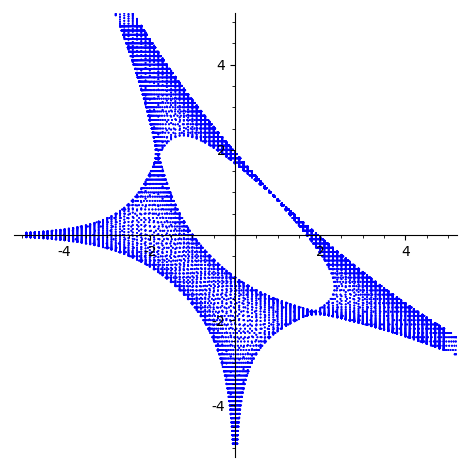

In [4]:
amoeba(P)

Compare with the Newton polytope:

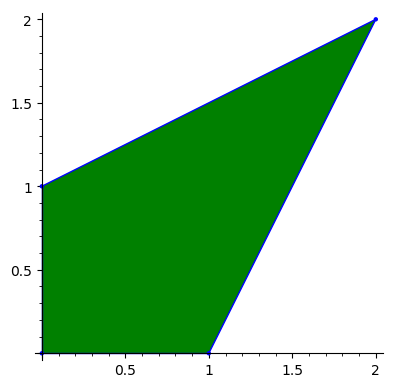

In [5]:
P.newton_polytope().plot()

The following plots the ''contour'' of the amoeba. The code is adapted from [Stephen Melczer's example 3.19](https://melczer.ca/files/TextbookCode/Chapter3/Example3-19-SketchingContour.html).

In [6]:
RR.<zz,ww,t>=PolynomialRing(CDF,3,'zz,ww,t',order='lex') #we need an extra variable 't' in the polynomial ring

def contour (f, t_step=100, tm=-10, tM=10, xm=-5., xM=5., ym=-5., yM=5.):
    # Same arguments as before, except now we discretize in t between tm and tM with t_step steps.
    List_t = srange(tm,tM,(tM-tm)/t_step,universe=CDF)
    List_sol = []
    ff = RR(f.subs({z:zz,w:ww})) #putting f into the new ring RR
    sys = [ff,ff.derivative(zz)*zz-t*ff.derivative(ww)*ww] #system of equations parametrizing the curves by t
    I = RR.ideal(sys)
    GB = I.groebner_basis()
    Pyt = GB[-1] #because of the order, Pyt is a poly in ww and t (implicitely giving ww from t)
    X = GB[-2].subs({zz:x}).solve(x)[0].rhs() #X gives zz as function of ww and t
    for val_t in List_t:
        l_w = Pyt.subs({t:val_t}).univariate_polynomial().roots(multiplicities=False) #find the roots in ww
        for val_w in l_w:
            val_z = X.subs(ww=val_w,t=val_t) #substitute to get zz
            List_sol.append( (log(abs(val_z)),log(abs(val_w))) )
    return list_plot(List_sol, aspect_ratio=1, size=2, xmin=xm, xmax=xM, ymin=ym, ymax=yM)

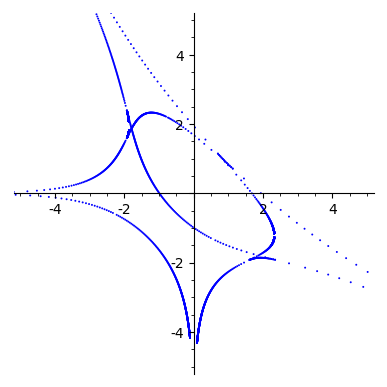

In [7]:
contour(P, t_step=1000)

Plotting coamoebas

In [8]:
def coamoeba (f, grid_step=100, angle_step=50, xm=-5., xM=5., ym=-5., yM=5.):
    # Takes a polynomial f in z,w over CDF and draws its coamoeba.
    # High values of grid_step and angle_step give a more full picture but make the computation longer
    pi=CDF(4.*atan(1.))
    
    x_grid_step_size = (xM-xm)/grid_step
    List_x = []
    for j in range(1,grid_step):
        r=CDF(xm+j*x_grid_step_size)
        for k in srange(0,angle_step):
            theta = CDF(-pi + (k/angle_step)*2*pi)
            z1 = CDF(e^r * e^(I*theta))
            g = f(z1,w)
            h = g.univariate_polynomial()
            S = h.roots(multiplicities=False)
            for p2 in S:
                theta2 = arg(p2)
                List_x.append((theta,theta2))
                
    y_grid_step_size = (yM-ym)/grid_step
    List_y = []
    for j in range(1,grid_step):
        r=CDF(ym+j*y_grid_step_size)
        for k in srange(0,angle_step):
            theta = CDF(-pi + (k/angle_step)*2*pi)
            w1 = CDF(e^r * e^(I*theta))
            g = f(z,w1)
            h=g.univariate_polynomial()
            S=h.roots(multiplicities=False)
            for p2 in S:
                theta2 = arg(p2)
                List_y.append((theta2,theta))

    return ( list_plot(List_x, aspect_ratio=1, size=2, xmin=-pi, xmax=pi, ymin=-pi, ymax=pi) +
             list_plot(List_y, aspect_ratio=1, size=2, xmin=-pi, xmax=pi, ymin=-pi, ymax=pi) )

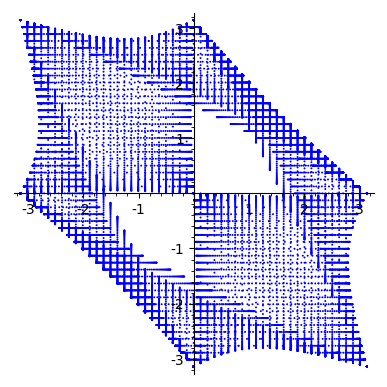

In [9]:
coamoeba(P)